# Cariovascular Disease Predictions Using Heart Activity

## Introduction:

~17.9 million lives are lost each year due to cardiovascular diseases. Heart activity such as one's age and maximum heart rate can be used to detect cardiovascular diseases. For this project, we want to use the dataset “Heart Failure Prediction Dataset” to answer our question:

***"Can we use one's age and maximum heart rate to accurately predict whether or not they are at risk of heart disease?"***

This dataset is a combination of independent datasets from hospitals in Hungary, Switzerland, and the United States of America. The dataset includes eleven variables that can be used to predict heart disease. However, we will only investigate the age and the maximum heart rates of the observations, as we want to know if heart activity alone can be used to accurately predict cardiovascular diseases.

#### *Variables in dataset:*

* Age: age of the patient [years]
* Sex: sex of the patient [M: Male, F: Female]
* ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* RestingBP: resting blood pressure [mm Hg]
* Cholesterol: serum cholesterol [mm/dl]
* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST  elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
* ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
* Oldpeak: oldpeak = ST [Numeric value measured in depression]
* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* HeartDisease: output class [1: heart disease, 0: Normal] 

## Methods & Results:

#### Preliminary Exploratory Data Analysis:

To start, we will load the data set from its online source into R, as well as the library packages required for our data analysis.

In [16]:
###
### Run this cell before continuing.
###

library(tidyverse)
library(repr)
library(tidymodels)
library(RColorBrewer)

In [17]:
heart_data <- read_csv("https://raw.githubusercontent.com/tyih985/Cariovascular-Disease-Predictions-Using-Heart-Activity/refs/heads/main/heart.csv")
glimpse(heart_data)

Rows: 918 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope
dbl (7): Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak, HeartDisease

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 918
Columns: 12
$ Age            <dbl> 40, 49, 37, 48, 54, 39, 45, 54, 37, 48, 37, 58, 39, 49,…
$ Sex            <chr> "M", "F", "M", "F", "M", "M", "F", "M", "M", "F", "F", …
$ ChestPainType  <chr> "ATA", "NAP", "ATA", "ASY", "NAP", "NAP", "ATA", "ATA",…
$ RestingBP      <dbl> 140, 160, 130, 138, 150, 120, 130, 110, 140, 120, 130, …
$ Cholesterol    <dbl> 289, 180, 283, 214, 195, 339, 237, 208, 207, 284, 211, …
$ FastingBS      <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ RestingECG     <chr> "Normal", "Normal", "ST", "Normal", "Normal", "Normal",…
$ MaxHR          <dbl> 172, 156, 98, 108, 122, 170, 170, 142, 130, 120, 142, 9…
$ ExerciseAngina <chr> "N", "N", "N", "Y", "N", "N", "N", "N", "Y", "N", "N", …
$ Oldpeak        <dbl> 0.0, 1.0, 0.0, 1.5, 0.0, 0.0, 0.0, 0.0, 1.5, 0.0, 0.0, …
$ ST_Slope       <chr> "Up", "Flat", "Up", "Flat", "Up", "Up", "Up", "Up", "Fl…
$ HeartDisease   <dbl> 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1…


> **Figure 1:** Glimpse of “Heart Failure Prediction Dataset” after being loaded into R

Next, we will select only the variables that we are interested in from the data set. This includes the response variable, HeartDisease, and the variables that are of data type "double", as we only want to use numerical values as predictors. We will further clean and wrangle the data set by renaming the column names so that they use snake case, and also mutate the heart_disease variable so that it is of data type "factor". Lastly, we will change the values in the heart_disease column to make it more clear whether an observation has heart disease or not.

In [18]:
heart_data_cleaned <- heart_data |> select(Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak, HeartDisease) |>
                                    rename(age = Age, resting_bp = RestingBP, cholesterol = Cholesterol,
                                           fasting_bs = FastingBS, max_hr = MaxHR, oldpeak = Oldpeak,
                                           heart_disease = HeartDisease) |>
                                    mutate(heart_disease = as_factor(heart_disease)) |>
                                    mutate(heart_disease = fct_recode(heart_disease, "yes" = "1", "no" = "0"))

glimpse(heart_data_cleaned)

Rows: 918
Columns: 7
$ age           <dbl> 40, 49, 37, 48, 54, 39, 45, 54, 37, 48, 37, 58, 39, 49, …
$ resting_bp    <dbl> 140, 160, 130, 138, 150, 120, 130, 110, 140, 120, 130, 1…
$ cholesterol   <dbl> 289, 180, 283, 214, 195, 339, 237, 208, 207, 284, 211, 1…
$ fasting_bs    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ max_hr        <dbl> 172, 156, 98, 108, 122, 170, 170, 142, 130, 120, 142, 99…
$ oldpeak       <dbl> 0.0, 1.0, 0.0, 1.5, 0.0, 0.0, 0.0, 0.0, 1.5, 0.0, 0.0, 2…
$ heart_disease <fct> no, yes, no, yes, no, no, no, no, yes, no, no, yes, no, …


> **Figure 2:** Glimpse of “Heart Failure Prediction Dataset” after being cleaned and wrangled

Before continuing, we will further clean our data set by seeing which variables our model should actually use as predictor variables. To do this, we compared the density distributions of each variable for the two classes in the data set. From this, we can determine which variables are useful predictor variables when distinguishing between those with heart disease, and those without heart disease.

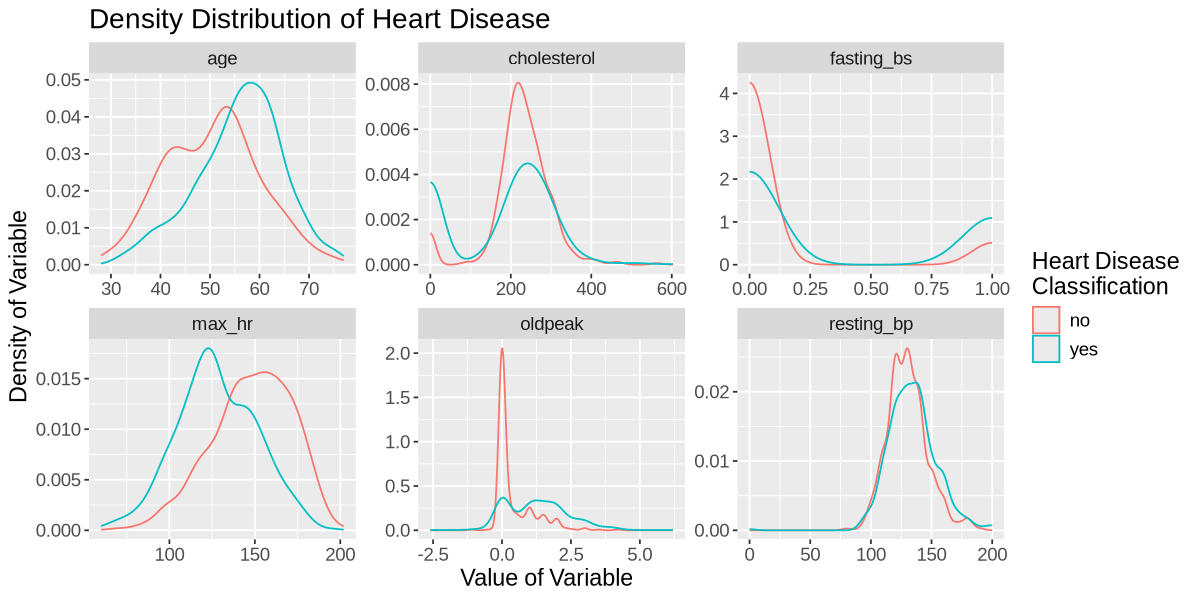

In [19]:
options(repr.plot.width = 10, repr.plot.height = 5)
heart_density <- heart_data_cleaned |>
                 pivot_longer(1:6, names_to = 'category', values_to = 'value') |>
                 ggplot(aes(x = value)) +
                 geom_density(aes(color = heart_disease)) +
                 facet_wrap(facets = vars(category), ncol = 3, scales="free") + 
                 labs(x= "Value of Variable",  y = "Density of Variable", color = "Heart Disease\nClassification") + 
                 ggtitle("Density Distribution of Heart Disease") + 
                 theme(text = element_text(size = 14))

heart_density

> **Figure 3:** Density distributions across each variable for those with heart disease (blue), and those without heart disease (red)

As we can see from Figure 3, only the age and max_hr variables have different distributions depending on the two classes in the data set. We can now further clean and wrangle our data set by selecting only these two variables to use as predictor variables.

In [20]:
heart_data_cleaned <- heart_data_cleaned |> select(age, max_hr, heart_disease)

glimpse(heart_data_cleaned)

Rows: 918
Columns: 3
$ age           <dbl> 40, 49, 37, 48, 54, 39, 45, 54, 37, 48, 37, 58, 39, 49, …
$ max_hr        <dbl> 172, 156, 98, 108, 122, 170, 170, 142, 130, 120, 142, 99…
$ heart_disease <fct> no, yes, no, yes, no, no, no, no, yes, no, no, yes, no, …


> **Figure 4:** Glimpse of “Heart Failure Prediction Dataset” after selecting our predictor variables

Now, we will split the data set into a training set and test set. We will use only the training set when building our classification model. After that, we will evaluate the performance of our classification model by having it predict the class for each observation in the test set. We will use 75% of the original data for training and 25% of the original data for testing. We will also set the seed that we will be using during our data analysis as 1234.

In [21]:
# setting the seed
set.seed(1234)

heart_split <- initial_split(heart_data_cleaned, prop = 0.75, strata = heart_disease)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

glimpse(heart_train)
glimpse(heart_test)

Rows: 688
Columns: 3
$ age           <dbl> 37, 39, 54, 48, 42, 43, 43, 44, 49, 40, 36, 52, 53, 56, …
$ max_hr        <dbl> 98, 170, 142, 120, 137, 165, 142, 142, 164, 138, 178, 11…
$ heart_disease <fct> no, no, no, no, no, no, no, no, no, no, no, no, no, no, …
Rows: 230
Columns: 3
$ age           <dbl> 40, 54, 45, 37, 39, 49, 54, 44, 53, 51, 43, 43, 37, 52, …
$ max_hr        <dbl> 172, 122, 170, 142, 145, 140, 150, 150, 112, 145, 154, 1…
$ heart_disease <fct> no, no, no, no, no, yes, no, yes, no, no, no, yes, no, n…


> **Figure 5:** Glimpse of the training set and test set being used in our data analysis

To determine whether or not the dataset needs any rebalancing/oversampling, we will count the number of observations in each class using summarize().

In [22]:
class_count <- heart_train |>
               group_by(heart_disease) |>
               count()
class_count

heart_disease,n
<fct>,<int>
no,307
yes,381


> **Figure 6:** Summarized count of each class in the training set

It can be seen that there is not a significant imbalance between the two classes in our training set, so no rebalancing/oversampling is necessary.

Next, we used summarize() to find the mean value of max_hr for those with heart disease, and for those without heart disease. This gives us more background knowledge and context to use when we answer our predictive question, as it gives us the average values of max_hr for the two classes in our data set.

In [23]:
heart_summary <- heart_train |>
    group_by(heart_disease) |>
    summarize(mean_age = mean(age), mean_max_hr = mean(max_hr))
heart_summary

heart_disease,mean_age,mean_max_hr
<fct>,<dbl>,<dbl>
no,50.91205,147.9023
yes,55.96325,127.8504


> **Figure 7:** Summarized average value for each predictor variable for each class

It can be seen that those with heart disease tend to be older and have a lower maximum heart rate. We will now create a scatterplot visualization of age versus maximum heart rate to further explore this relationship between our two predictor variables.

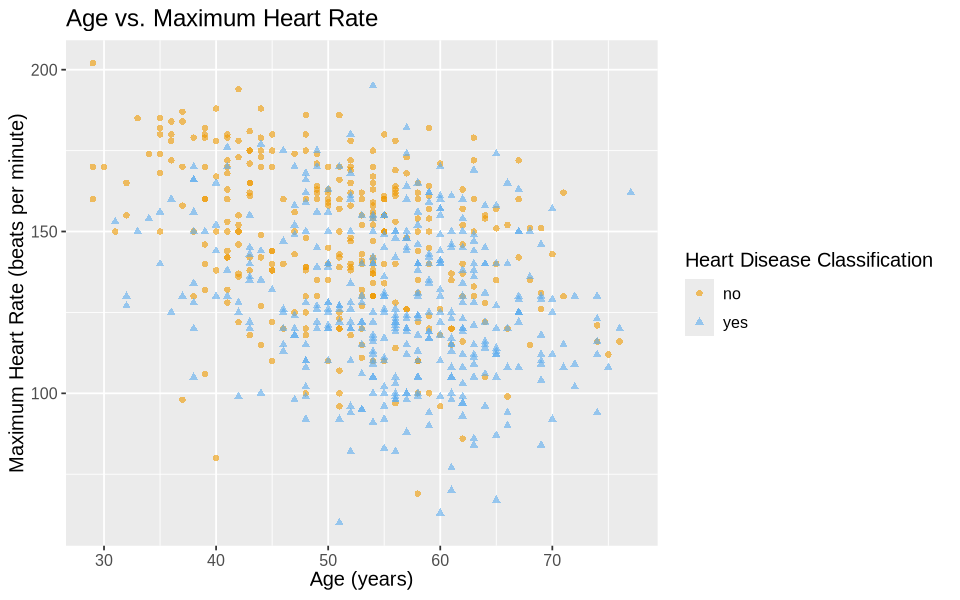

In [24]:
options(repr.plot.width = 8, repr.plot.height = 5)
heart_plot <- ggplot(heart_train, aes(x = age, y = max_hr,
                                                color = heart_disease, shape = heart_disease)) +
              geom_point(alpha = 0.6) +
              labs(x = "Age (years)", y = "Maximum Heart Rate (beats per minute)",
                   color = "Heart Disease Classification", shape = "Heart Disease Classification") +
              scale_color_manual(values = c("orange2", "steelblue2")) +
              ggtitle(paste0("Age vs. Maximum Heart Rate")) + 
              theme(text = element_text(size = 12),
              legend.position = "right", legend.direction = "vertical")

heart_plot

> **Figure 8:** Scatterplot visualization of the relationship between our two predictor variables

From the scatterplot above, we can see that there is a weak, negative relationship between our two predictor variables (as age increases, maximum heart rate decreases). We can also see that those with heart disease tend to have a higher age and lower maximum heart rate. Knowing this gives us more background knowledge and context to use when building our classification model and answering our predictive question. We will now build our classification model.

#### Data Analysis:

The first step to building our model will be to standardize and preprocess the training set. To do this, we will create a standardization preprocessor (a recipe). Once again, we will set the seed as 1234.

In [25]:
# setting the seed
set.seed(1234)

# creating a recipe
heart_recipe <- recipe(heart_disease ~ age + max_hr, 
                        data = heart_train) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors())

heart_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



> **Figure 9:** Recipe being used to build our classification model

To get an estimated accuracy for our classification model after it is built, we will perform 5-fold cross-validation while building our model. We will do this by using the vfold_cv() function to create training and validation subsets from the training set.

We will also create 30 different classification models using different K values and compare their accuracies with each other. This will tell us which K value will yield the most accurate results when building our classification model. To do this, we will build a model which can be tuned.

Finally, we will put all of the data analysis steps so far into one workflow using the workflow() function.

In [26]:
# setting the seed
set.seed(1234)

# preparing to use 5-fold-cross-validation
heart_vfold <- vfold_cv(heart_train, v = 5, strata = heart_disease)

# creating a model which can be tuned
heart_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
              set_engine("kknn") |>
              set_mode("classification")

# 30 different K values
k_vals <- tibble(neighbors = seq(from = 1, to = 30, by = 1))

# putting it all together in a workflow
knn_results <- workflow() |>
               add_recipe(heart_recipe) |>
               add_model(heart_tune) |>
               tune_grid(resamples = heart_vfold, grid = k_vals) |>
               collect_metrics()

# take the estimated accuracies for all 30 classification models
accuracies <- knn_results |> 
      filter(.metric == "accuracy") |>
      select(neighbors, mean)

To compare the accuracies of the different classification models, we will create a visualization of the value of K vs. the estimated accuracy of the classification models. This will help us decide which K value we should use when building our final classification model. 

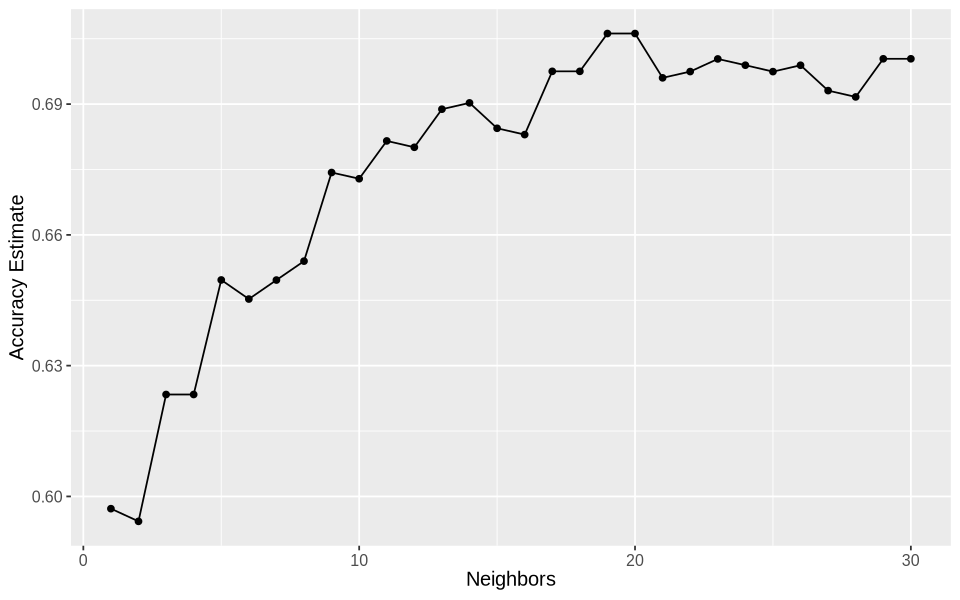

In [27]:
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                        geom_point() +
                        geom_line() +
                        labs(x = "Neighbors", y = "Accuracy Estimate") + 
                        theme(text = element_text(size = 12))

accuracy_vs_k

> **Figure 10:** Scatterplot visualization of estimated accuracy versus the number of neighbors

It can be seen that K = 20 provides the highest estimated accuracy. Furthermore, Figure 10 shows that the estimated accuracy of our model only changes by a small amount if we increase or decrease the value of K  near K = 20. Lastly, using a value of K = 20 does not create a classification model that requires a lot of computational processing.

Considering these three points, we can conclude that we should use the value of K = 20 to build our final classification model, which will then be evaluated after predicting the class of each observation in the test set.

In [28]:
# setting the seed
set.seed(1234)

# build the final classification model using the value of K = 20
heart_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 20) |>
              set_engine("kknn") |>
              set_mode("classification")

# putting it all together in a workflow (we can use the same recipe from earlier)
heart_fit <- workflow() |>
       add_recipe(heart_recipe) |>
       add_model(heart_spec) |>
       fit(data = heart_train)

Now that our final classification model has been built, we will evaluate its performance by comparing its predictions of the classes of the observations in the test set with the observations' actual class.

In [29]:
# use the final classification model to predict the class of the observations in the test set
heart_preds <- predict(heart_fit, heart_test) |>
                      bind_cols(heart_test)

# find the accuracy of our final classification model
accuracy <- heart_preds |>
            metrics(truth = heart_disease, estimate = .pred_class) |>
            filter(.metric == "accuracy") |>
            select(.metric, .estimate)

accuracy

.metric,.estimate
<chr>,<dbl>
accuracy,0.7217391


> **Figure 11:** The observed accuracy of our final classification model

Our final classification model had an accuracy of ~72.17% when predicting the classes of the observations in the test set.

We will now use the conf_mat() function to examine the confusion matrix to further analyze our results.

In [30]:
confusion <- heart_preds |>
             conf_mat(truth = heart_disease, estimate = .pred_class)

confusion

          Truth
Prediction no yes
       no  68  29
       yes 35  98

> **Figure 12:** Summarized count of predicted class and actual class of all observations in test set

The confusion matrix shows us that 68 observations were correctly predicted to not have heart disease, and 98 were correctly predicted to have heart disease. It also shows that our classification model predicted 29 observations to not have heart disease when they did, and 35 observations to have heart disease when they did not.

## Discussion:

#### True positive = 98 patients correctly predicted to have cardiovascular disease
#### True negative = 68 patients correctly predicted to NOT have cardiovascular disease
#### False positive = 35 patients incorrectly predicted to have cardiovascular disease
#### False negative = 29 patients incorrectly predicted to NOT have cardiovascular disease

Our two predictor variables, age and maximum heart rate, indicate that patients who are at risk of cardiovascular disease have lower maximum heart rates and are of older age. To answer our question (using age and maximum heart rate as our predictors), we built a classification model using K = 20 to predict the class of each observation in the test set. Then we evaluated the accuracy of our classifier to see whether the predictions of the classes of the observations match the observations made in the test set. With an accuracy of ~72.17%, our classifier is inadequate because our classifier is used in the context of correctly predicting whether a patient has a risk of cardiovascular disease. Failing to assess the risk can be life-threatening to a patient and their quality of life. 

As a result, we must include precision and recall when we evaluate the performance of our classifier. Precision shows the number of positive predictions the classifier correctly made in accordance with the observations made in the test set, while recall indicates the number of positive observations in the test set that is labelled as a positive prediction from the classifier. In general, it is ideal if both of these metrics are high in our classifier because it guarantees us that our classifier can find the positive observations of a test set and produce positive predictions that match the observations made in a test set. 

To calculate the precision and recall of our classifier, we use the content of the confusion matrix and the formulae:

#### Precision = number of correct positive predictions/total number of positive predictions
#### = 98 / (98+35) = 98 / 133 = 0.73684 = ~74%

#### Recall =  number of correct positive predictions/total number of positive set observations
#### = 98 / (98+29) = 98 / 127 = 0.77165 = ~77%

In comparison to our accuracy of \~72.17%, the precision and recall are in a similar range but are slightly higher. Although these metrics make the classifier unideal for predicting the life-or-death risk of cardiovascular disease, the percentages (\~74% and ~77%) reflect that our classifier is somewhat capable of making correct predictions in relevance to the test set. In regards to the precision, the classifier will be able to find positive observations but will include some false negative predictions (patients incorrectly predicted to NOT have cardiovascular disease). Similarly, in terms of recall, the classifier can correctly identify a positive observation of a test set but will incorrectly label some false positive predictions (patients incorrectly predicted to have cardiovascular disease). From this, it is clear that using age and maximum heart rate as our predictor variables is an overall decent predictor of cardiovascular disease, but is it far from ideal for real-life use. 

*Side note: If we wanted to improve our model, one solution could be to include more variables from the dataset. Although this would make the model more complex and more difficult to interpret, the accuracy could rise due to the use of multiple variables. For example, we would not be able to determine which of the many variables affects the target variable the most without doing further analysis of the dataset.*

#### Is this what you expected to find?
We expected to find that patients with higher maximum heart rates would have a higher risk of heart disease. However, Figure 8 contradicts this as the two predictor variables share a weak, negative relationship whereas age increases, the maximum heart rate decreases. 

#### What impact could such findings have?
Finding the exact turning point for when someone's maximum heart rate starts to put them at risk of cardiovascular diseases can help determine if a patient is at risk of cardiovascular diseases. This ensures that the patient receives adequate medical care to avoid premature death. The finding could also lead to better health advice to prevent patients from getting heart diseases in the first place. Being able to predict the number of people at risk of getting heart diseases in the future can also be useful in to prepare the hospitals in the country to make extra space if the analysis shows an increase in the number of patients at risk of heart diseases.

#### What future questions could this lead to?
The future questions we have for our analysis are: Other than the eleven predictors of heart disease in this dataset, are there any other factors that determine whether a person is at risk of cardiovascular disease? Since family history and genetics were excluded from this dataset, do these factors influence heart disease prediction? Does genetic makeup hold more weight in this prediction than heart activity? How does training and diet affect heart disease? From a historical perspective, is there an increasing or decreasing tendency for heart disease?

## References:

DukeHealth. (2019, October 2). Age is the biggest risk for heart disease, but lifestyle and meds have impact. Duke Health. https://corporate.dukehealth.org/news/age-biggest-risk-heart-disease-lifestyle-and-meds-have-impact

Fedesoriano. (2021, September 10). Heart Failure Prediction Dataset. Kaggle. https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

Medanta. (2022, May 20). Normal vs. dangerous heart rate: An overview. Medanta. https://www.medanta.org/patient-education-blog/normal-vs-dangerous-heart-rate#:~:text=Abnormal%20Heart%20Rates%20or%20Heart,doctor's%20intervention%20is%20a%20must

Timbers, T.-A., Campbell, T., & Lee, M. (2022). Data science: A first introduction. Chapman and Hall. https://datasciencebook.ca

World Health Organization. (2023). Cardiovascular diseases. World Health Organization. https://www.who.int/health-topics/cardiovascular-diseases#tab=tab_1